In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la
import scipy.stats as st

# 1.1 - Univariate Probability 

This material mostly follows from 

- DelSole, Timothy, and Michael Tippett. Statistical methods for climate scientists. Cambridge University Press, 2022. Chapter 1 
- Jacobs, Kurt. Stochastic processes for physicists: understanding noisy systems. Cambridge University Press, 2010. Chapter 1

## Probability Distribution Functions

- Most people already have an intuitive idea of probability as "how likely it is something will happen". To make this math-y, imagine that there is a random variable x. the probability of that the random variable $x$ has a value between $x_1$ and $x_2$ is  $$\mathrm{Probability}(x_1<x<x_2)=\int_{x_1}^{x_2}P(x) dx$$

- The thing on the right hand side is the same, but $P(x)$ is the probability density function, its a function that gives probability of $X$ being inside the interval ($x$,$x+dx$). By definition, $P(x)$ is normalized so that  $$\int_{-\infty}^{\infty} P(x) dx=1$$

- Sometimes we need the "Cumulative Distribution Function" which is defined as $$C(x) = \int_{-\infty}^{x} P(x) dx$$ Whereas $P(x)$ is the probability of a random variable being $x$, $C(x)$ is the probability of a random variable being less than $x$.

# Moments of a Probability Distribution

- The expectation of a function for some random variable is $$\left<f(x)\right>=\int P(x) f(x) dx$$ This seems intimidating at first, but we can think about it as a kind of weighted average. $P(x)$ is basically weighting the different parts of the domain where $f$ is defined. 
- You probably know some expectation values already. For instance, if we set $f(x)=x$, we get the mean: $$\left<x\right>=\int P(x) x dx$$
- if we set $f(x)=\left(x-\left< x\right>\right)^2$, we get the expression for the variance: $$V(x)=\left<(x-\left<x\right>)^2\right>=\int P(x) (x-\left<x\right>)^2 dx$$
    - Note that $<x>$ is just a number, and so we can expand the previous expression and move <x> outside the integral to write: 
    $$V(x)=\int P(x) x^2 dx -2\left<x\right>\int P(x) x dx + \left<x\right>^2\int P(x) dx $$
    - if we define $x'=x-<x>$, and do the integral and use the definition of expectation values we get: $$\left<x'^2\right>=\left<x^2\right>-\left<x\right>^2$$ This result is ubiquitous in the study of turbulent fluids, including meteorology, oceanography, and climatology. You will see it a lot if you haven't already.
- We can also define the standard deviation as $$s_x=\sqrt{\left<x'^2\right>}$$
- Often we will write $\mu$ to refer to $\left<x\right>$ and $\sigma$ to refer to $\sqrt{\left<x'^2\right>}$. Sorry that the terminology isn't consistent, but its not consistent across the literature either, so its good to get used to it now.
- For the most part in this course we will focus on the first two moments for reasons that will become obvious in a little bit. For reference however the next two statistical quantities that are:
    - the "skew", which is $\left(\left<x-\left<x\right>\right>\right)^3 s_x^{-3} $ which measures how much a distribution leans to the right or to the left
    - the kurtosis, $\left(\left<x-\left<x\right>\right>\right)^4 s_x^{-4} $, which measures how peaked a distribution is.

# Estimating from discrete data

- In the examples above we assumed that we already knew $P(x)$. What if this isn't the case? We need some way to estimate $P(x)$, or at least the moments. Consider the case where we have a data set, ${x_i}$, where each of the $x_i$ are a single realization of some experiment. Then we can estimate $P(x)$ by dividing the data into bins: $$N(x_1,x_2) = \mathrm{Number\,Of} x_i \in (x_1,x_2)$$ and then $P(x)$ can be estimated from $N(x_1,x_2)/N$, where $N$ is the number of samples. 

- For the mean, we can define an "estimator" function as  $\bar{x}=\frac{1}{N}\sum_i x_i$. 
  - note the difference between $\left<\cdot\right>$ and $\overline{\left(\cdot\right)}$ . The first is an exact value based on a theoretical probability distribution function. The second is an approximation which comes from the actual data set that we have. These have a lot of the same properties, but they have distinct meanings. 
- For the Variance, we can define the estimator as $$ s^2=\frac{1}{N-1}\sum_i (x_i-\bar{x})^2$$
  - It seems weird that we divide by $N-1$ for the variance. To understand this, we need to calculate the bias of our estimators. The bias is defined as $$B = \left<\overline{f}-f\right>$$, where $\overline{f}$ is the estimator of some function $f$, and $\left<f\right>$ is the expectation value. Obviously, we want $B=0$. 
  - I will give the proof that $B(s^2)=0$ in section after 1.3, when we have some more information about expectation of estimators.
  - much of the time the difference between $N-1$ and $N$ will not be significant, so we will ignore this factor and just treat it as a normal mean.

# Special Properties of the Gaussian and the Central Limit Thereom

The Gauassian distribution is 

$$P(x)=\frac{1}{\sqrt{2\pi s^2}} \exp\left(-\frac{(x-\mu)^2}{2 \sigma^2}\right)$$

- Often we will write this as $x \sim \mathcal{N}\left(\mu,\sigma^2 \right)$ to mean that $x$ is a random variable with a Gaussian probability distribution with mean $\mu$ and variance $\sigma^2$.

This has a number of special properties:
1. It is defined by only the mean and standard deviation 
2. For a given mean and standard deviation, the Gaussian maximizes the information entropy, so it is in some sense the most generic distribution with those two constraints
3. the sum of $N$ Gaussian variables must also be Gaussian. So if we have $N$ Gaussian variables each having mean $\mu_i$ and variance $\sigma_i^2$, then $$ \sum_i x_i \sim \mathcal{N}\left(\sum_i \mu_i, \sum_i \sigma_i^2 \right) $$ 
4. The **Central Limit Thereom**: If we have a sequence of independently drawn random variables $x_1,x_2,x_3,...x_n$, which have mean $\mu$ and standard deviation $\sigma$, then the new variable $$ z = \frac{\overline{x}-\mu}{\frac{\sigma}{\sqrt{n}}} $$ will be distributed as $z\sim \mathcal{N}\left(0,1\right)$ in the limit $n \rightarrow \infty$. 
   - The central limit theorem works regardless of the distribution of the $x_i$. This means that any mean of any random sequence of variables will converge to a Gaussian. This is why we often use Gaussian distributions as a default assumption for modelling noise - if the real noise is the result of many tiny fluctations, then the mean of those tiny fluctations will be approximately Gaussian, even if the individual fluctuations are not. 

# Some different probability distribution functions
- Uniform: probability distributed evenly over some region
- Exponetial: like a exponential function, between 0 and $\infty$, depends on one parameter. 
- Gaussian: the bell curve, defined by the mean and standard deviation.
<!-- - Weibull: used in extreme value theory, shown here to illustrate a pdf that has kurtosis and skewness. Bound by 0, so it scales between an exponential and a Gaussian. -->

In [2]:
#set up some plotting parameters common to all the distributions that we are going to plot
x=np.linspace(-5,5)
bins=np.linspace(-5,5,51)
centers=0.5*(bins[1:]+bins[:-1])
samples=500

In [3]:
help(np.random.rand)

Help on built-in function rand:

rand(...) method of numpy.random.mtrand.RandomState instance
    rand(d0, d1, ..., dn)
    
    Random values in a given shape.
    
    .. note::
        This is a convenience function for users porting code from Matlab,
        and wraps `random_sample`. That function takes a
        tuple to specify the size of the output, which is consistent with
        other NumPy functions like `numpy.zeros` and `numpy.ones`.
    
    Create an array of the given shape and populate it with
    random samples from a uniform distribution
    over ``[0, 1)``.
    
    Parameters
    ----------
    d0, d1, ..., dn : int, optional
        The dimensions of the returned array, must be non-negative.
        If no argument is given a single Python float is returned.
    
    Returns
    -------
    out : ndarray, shape ``(d0, d1, ..., dn)``
        Random values.
    
    See Also
    --------
    random
    
    Examples
    --------
    >>> np.random.rand(3,2)
    arra

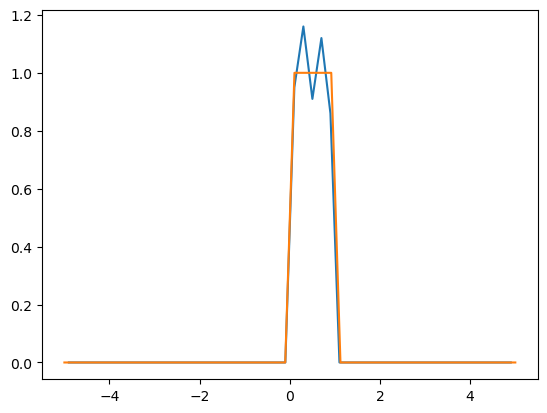

In [4]:
# make a plot of the uniform distribution

P = np.copy(x)*0
P[np.logical_and(x>=0,x<1)]=1

data = np.random.rand(samples)
b,e = np.histogram(data,bins=bins,density=True)
Pest = b

plt.plot(centers,Pest)
plt.plot(x,P)


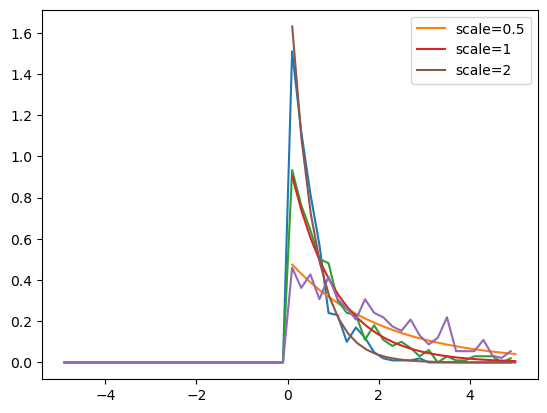

In [5]:
def expo(x,a):
    return a*np.exp(-a*x)

scales=[0.5,1,2]

for scale in scales:
    data = np.random.exponential(size=samples,scale=scale)

    Pest,e = np.histogram(data,bins=bins,density=True)

    plt.plot(centers,Pest)
    P=expo(x[25:],scale)
    plt.plot(x[25:],P,label=f'scale={scale}')

plt.legend()


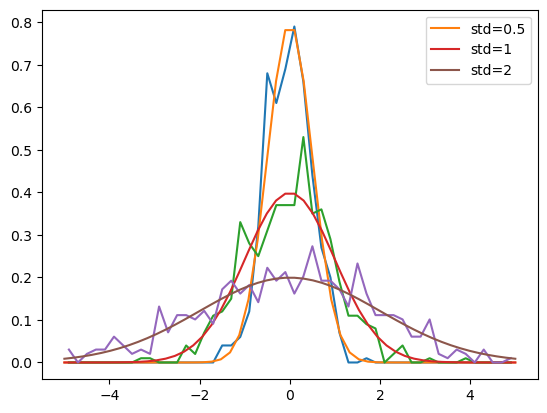

In [6]:
def gauss(x,a,b):
    return 1/np.sqrt(2*np.pi*b**2)*np.exp( -0.5*(x-a)**2/b**2)

scales=[0.5,1,2]

for scale in scales:
    data = np.random.normal(size=samples,scale=scale,loc=0)

    Pest,e = np.histogram(data,bins=bins,density=True)

    plt.plot(centers,Pest)
    P = gauss(x,0,scale)
    plt.plot(x,P,label=f'std={scale}')
plt.legend()


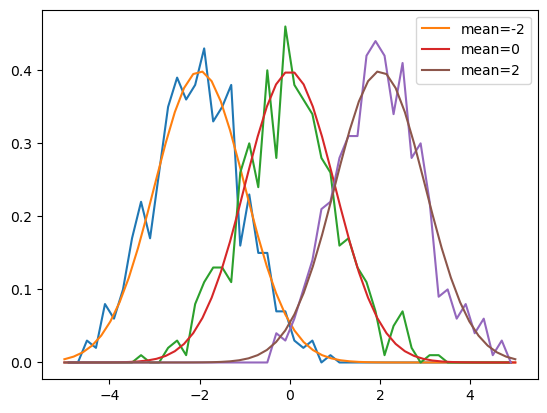

In [7]:
means=[-2,0,2]

for mean in means:
    data = np.random.normal(size=samples,scale=1,loc=mean)

    Pest,e = np.histogram(data,bins=bins,density=True)

    plt.plot(centers,Pest)
    P = gauss(x,mean,1)
    plt.plot(x,P,label=f'mean={mean}')
plt.legend()


# Some stuff about numpy
- numpy is one of the most important libraries for doing numerical calculations in python
- the main object in numpy is an array. Arrays are multidimensional data blocks. For instance, if you do something like x=np.zeros([5,6,7,8]) this will create a 5x6x7x8 block of zeros and store it into memory. 
- This has two advantages. One is that we can specify different dimensions to do operations on. The second is that array operations are much faster than doing loops. 
  - The reason for this is that your cpu is optimized to do 1 calculation a bunch of times at once in a process called vectorization (at the chip level it's because floating point arithmetic is done using a multiplexer on modern chips) which applies the same arithmetical operation to a block of data at once. If you write a loop in python it will load one value as a vector, apply the operation, and then start again. If you do arithmetic using numpy, it will load the data as a block and then apply to operation to all the values at once. 
  - Note that this doesn't mean that loops are always bad. There's lots of times working on this course where I couldn't figure out how to solve a problem without a loop. However for large operations, especially ones that you are repeating over and over its a good idea to use the numpy functions.
  - In most compiled languages the compiler is smart enough to replace a loop with a vectorized operation, which is one of the reasons why C and Fortran are fast. However python is interpreted, meaning that the code isn't compiled before it gets run. numpy is basically a cluge to fix this, in that it provides semi-optimized functions for you to use that are taking advantage of all the features of your cpu. If you're interested in really speeding your code up, I would recommend checking out either cython or numba. For this course you shouldn't need it though.

In [8]:
# this is a demo to show some of the ways to use numpy 

# this will make an array of numbers 
t = np.arange(0,30,1) 
print('original t')
print(t)
print(t.shape)

#  lets reshape t into a new shape
t=np.reshape(t,[2,3,5])
print('reshaped t')
print(t)
print(t.shape)

# take the mean over the last axis and check the shape:
tm=t.mean(axis=-1)
print('mean of last axis')
print(tm)
print(tm.shape)

# take the standard deviation over the first 2 dimensions:
ts = t.std(axis=(0,1))
print('standard deviation of the first two dimensions')
print(ts)
print(ts.shape)

# just to show how it works make an array of ones
B = np.ones([5,5])
print(B)

original t
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
(30,)
reshaped t
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]
  [10 11 12 13 14]]

 [[15 16 17 18 19]
  [20 21 22 23 24]
  [25 26 27 28 29]]]
(2, 3, 5)
mean of last axis
[[ 2.  7. 12.]
 [17. 22. 27.]]
(2, 3)
standard deviation of the first two dimensions
[8.53912564 8.53912564 8.53912564 8.53912564 8.53912564]
(5,)
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


# 1.2 - Multivariate Probability

This material mostly follows from 

- DelSole, Timothy, and Michael Tippett. Statistical methods for climate scientists. Cambridge University Press, 2022. Chapter 1 
- Jacobs, Kurt. Stochastic processes for physicists: understanding noisy systems. Cambridge University Press, 2010. Chapter 1


## Multivariable probability distributions

- Imagine now we have two variables, $x$ and $y$. The "joint" pdf, or the 2 dimensional pdf of both is $P(x,y)$. 
    - note that everything extends to ND, but we're only going to look at the 2d case.
- The conditional density of y is the probability of y given a particular value of x, which we will write $P(y|x)$. You can imagine that $P(y|x)$ is a 1D slice of the 2D $P(x,y)$ at a particular value of $x$. 
- If we integrate the joint density over one variable we will get back the 1D pdf: $$\int P(x,y) dy = P_y(y)$$ We write $P_y(y)$ to indicate that we got this distribution through integrating, and call it the margainal distribution. Sometimes the marginal is only taken over a limited range of values, but we're not going to consider that here. 
    - The marginal can also be written as the expectation value of the conditional distribution: $P_y(y) = \left< P(y|x)\right>$
- The joint probability can be written in terms of the marginals and conditional probabilities:$$P(x,y)=P(y|x)P_x(x)=P(x|y)P_y(y)$$
    - This leads to a result known as Baye's theorem: $P(x|y)=P(y|x)\frac{P(x)}{P(y)}$ 
- x and y are independent iff $P(x,y)=P(x)P(y)$.

## Moments of a multivariable probability distribution 

- The expectation value for a multivariate probability distribution is $$\left<f(x,y)\right> = \int P(x,y) f(x,y) dx dy$$
- to get the mean of 1 variable we can do something like: $$ \left< x \right> = \int P(x,y) x dx dy $$ 
- we can now do things like take the expectation of a product: $$ \left< xy \right> = \int P(x,y) xy dx dy $$ 
- Similarly to the variance, we can use this to define a covariance: $$\mathrm{Cov(x,y)}=\left< x'y' \right>$$
- The covariance is often written as a matrix, for instance if there is a set of three variables, x,y,z, then the covariance matrix is $$C = \begin{pmatrix} \left< x'x'\right>  & \left< x'y'\right> & \left< x'z'\right> \\ \left< y'x'\right>  & \left< y'y'\right> & \left< y'z'\right> \\ \left< z'x'\right>  & \left< z'y'\right>  & \left< z'z'\right> \end{pmatrix}$$
    - the matrix element can also be written as $$ C_{ij} = <x'_ix'_j> $$
- The covariance can also be used to define the correlation: $$\rho = \frac{\left< x'y' \right>}{\left< x'^2 \right>^{1/2}\left< y'^2 \right>^{1/2}}$$
- Analogously to the variance the covariance can be written $$\left< x'y' \right>=\left< xy \right>-\left< x\right>\left< y\right>$$ and so after doing some rearrange and substituting we can write $$\left< xy \right> = \left< x\right>\left< y\right> + \rho {\left< x'^2 \right>^{1/2}\left< y'^2 \right>^{1/2}} $$ Again this expression, or in a slightly manipulated form, comes up very often in the study of turbulent fluids. For instance imagine that $x$ is the velocity and $y$ is the temperature, and the probability is an average over some domain, then our expression tells us how to divide the flow into laminar and turbulent components, and what the turbulent component depends on.
- If two variables are independent, then  $$ \left< xy \right> = \int P(x) x dx \int P(y) dy  = \left<x\right>\left<y\right>$$  which implies that $\left<x'y'\right>=0$ and also $\rho(x,y)=0$.
  - note that the converse is not also true, two variables can be uncorrelated but still be dependent.

## Estimating the moments
- similar to the univariate case, we can define the mean as $\overline{xy}=\frac{1}{M}\sum_{i=1}^{i=M} x_iy_i$
- The covariance can be estimated using matrix algebra. Suppose that we have $N$ variables, that are sampled M times. To make it simple, lets assume that all the variables have 0 mean. The data can be formed into a $NxM$ matrix $X$. Then the covariance matrix can be estimated using $$ C = \frac{1}{M} XX^T$$
- everything that comes from the exact definitions using expectation values also carries over into the estimators,  e.g. $\overline{xy}=\overline{x'y'}+\overline{x}\,\overline{y}$.
 

## Multivariate Gaussians

- imagine we have a set of N variables. Now put them into a vector $\vec{x}$. The mean vector is $\vec{mu}=\left<\vec{x}\right>$, and the covariance matrix is $$\Gamma = \left<\vec{x}\vec{x}^T\right> - \vec{\mu}\vec{\mu}^T$$

    - note that since $X$ is Nx1, $X^T$ is 1xN, so $\Gamma$ is NxN.

- The multivariate Gaussian distribution is $$\mathrm{N}(\vec{x},\vec{\mu},\Gamma)=\frac{1}{\sqrt{(2\pi)^N\mathrm{det}(\Gamma)}}\exp\left(-\frac{1}{2}\left(\vec{x}-\vec{\mu}\right)^T\Gamma^{-1}\left(\vec{x}-\vec{\mu}\right)\right)$$

- This expression looks intimidating, but we can think about it for the N=2 case. Imagine that $x$ and $y$ are two variables, and that they have mean 0, equal standard deviations, and correlation $\rho$. Its trivial to show that $$\Gamma=s^2\begin{pmatrix} 1 & \rho \\ \rho & 1 \end{pmatrix},$$ so then $\mathrm{det}\left(\Gamma\right)=s{^2}\left(1-\rho^2\right)$, and $$\Gamma^{-1}=\frac{1}{s^2\left(1-\rho^2\right)}\begin{pmatrix} 1 & -\rho \\ -\rho & 1 \end{pmatrix}$$ Next, the expression inside the exponential can be evaluted to give $$\frac{x^2+y^2-2\rho x y}{s^{2}\left(1-\rho^2\right)}$$ so that the final expression is is $$P(x,y)=\frac{1}{2\pi s\sqrt{1-\rho^2}}\exp\left(-\frac{1}{2}\frac{x^2+y^2-2\rho x y}{s^{2}\left(1-\rho^2\right)}\right)$$

    - If $\rho \rightarrow 0$ then $P(x,y)\rightarrow N(x)N(y)$, which makes sense since in that case the variables are indepdent.
    - If $\rho \rightarrow 1$ then $P(x,y)\rightarrow \delta(x,y)$, where $\delta$ is a dirac delta function. In other words, if the variables are perfectly correlated, then the probability density function is concentrated at the points where $x=y$.

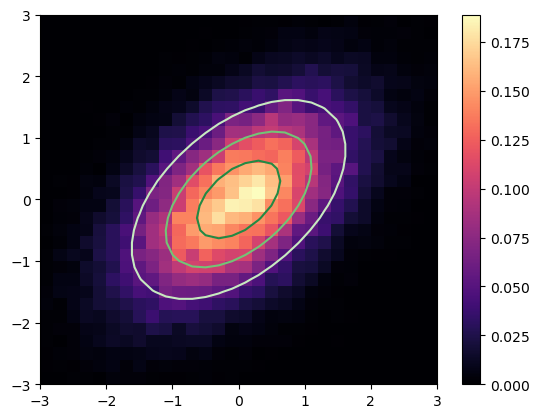

In [9]:
# you can try changing rho and rerunning the simulation
rho=0.5

# try making plots of a multivariate normal with std=1 and mean=0
mean=np.array([0,0])
cov=np.array([[1,rho],[rho,1]])

samples=np.random.multivariate_normal(mean=mean,cov=cov,size=(50000))

#samples is transposed, so fix that
samples = np.transpose(np.array(samples))

#get the bin edges, centers and "area element"
bins_e=np.linspace(-3,3,31)
bins_c=0.5*(bins_e[1:]+bins_e[:-1])
dbin=(bins_e[1]-bins_e[0])**2

counts,_,_=np.histogram2d(x=samples[0],y=samples[1],bins=[bins_e,bins_e])

plt.pcolormesh(bins_c,bins_c,counts/np.sum(counts)/dbin,cmap=plt.cm.magma)
plt.colorbar()

# meshgrid makes 2d versions of the grid cells, which is useful for making 2d functions 
x2,y2=np.meshgrid(bins_c,bins_c)
#its useful to build functions up in steps sometimes, which I'll show here
P=np.exp(-0.5*(x2**2+y2**2-2*rho*x2*y2)/(1-rho**2))
P*=1/(2*np.pi*np.sqrt(1-rho**2))

plt.contour(bins_c,bins_c,P,cmap=plt.cm.Greens,levels=np.linspace(0,0.2,5))

# Doing linear algebra with Python
- 1D numpy arrays can thought of as vectors, 2D numpy arrays are matrices
- a numpy array can be transposed using either np.transpose or A.T
- np.dot computes a dot product between two vectors. When 1 input is a matrix this is equivalent to doing a matrix times a vector, and when the inputs are two matrices this is equivalent to doing matrix multiplication. 
- For whatever reason most of the matrix functions are contained inside either numpy.linalg and scipy.linalg. In general the two packages are mostly the same, but usually scipy.linalg has better performance because its using some compiled fortran on the backend. 

In [10]:
# lets do some vector algebra as an example

x = np.array([0,1,2])

print('x')
print(x)

x = np.array([[0,1,2]])

#check the shape of x and its transpose now
print('shape of x and x.T')
print(x.shape, x.T.shape)

A = np.array([[1,2,3],[1,3,2],[2,3,1]])
print('A:')
print(A)
print('A.T:')
print(A.T)
print('inv(A)')
print(la.inv(A))

print('matrix product Ax')
print(np.dot(A,x.T))
#why did we have to take the transpose here?

print('matrix product A and inv(A)')
print(np.dot(la.inv(A),A))

x
[0 1 2]
shape of x and x.T
(1, 3) (3, 1)
A:
[[1 2 3]
 [1 3 2]
 [2 3 1]]
A.T:
[[1 1 2]
 [2 3 3]
 [3 2 1]]
inv(A)
[[ 0.5        -1.16666667  0.83333333]
 [-0.5         0.83333333 -0.16666667]
 [ 0.5        -0.16666667 -0.16666667]]
matrix product Ax
[[8]
 [7]
 [5]]
matrix product A and inv(A)
[[ 1.00000000e+00  4.44089210e-16  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00 -1.11022302e-16]
 [ 0.00000000e+00 -5.55111512e-17  1.00000000e+00]]


# 1.3 - Hypothesis testing and Confidence Intervals

This material mostly follows from 

- DelSole, Timothy, and Michael Tippett. Statistical methods for climate scientists. Cambridge University Press, 2022. Chapter 2-3 

## Outline
- The problem:
  - Suppose that we have some data, $x_i$. We want to know if the mean of that data is $\mu$. The problem is that our data is noisy, so in general $\overline{x}\neq\mu$.
  - Instead, what we want to test is whether $|\overline{x}-\mu|<\delta$. How should we pick $\delta$? In other words, how close does $\overline{x}$ have to be to $\mu$ in order for us to conclude that they are the same? This is the idea of a hypothesis test.
  - We could also flip the problem around and ask how to pick $\delta$ such that $\mu \in \left(\overline{x}-\delta, \overline{x}+\delta\right)$ a certain fraction fo the time. This is the idea of a confidence interval.
- The idea of confidence intervals and hypothesis testing is the same. We formulate a hypothesis, and then calculate a distribution of what our statistic would look like if that hypothesis was true. Based on that distribution, we calculate how likely it is to see an observation. 
- Here's a math-y sketch of how it works. Suppose that we have a statistic $z$, which has an estimator $\overline{z}$. We will hypothesize that $\overline{z}$ has a distribution $P(z)$ with a mean of 0. This assumption is called the null hypothesis.
  - We can find $$ \int_{-z_{p/2}}^{z_{p/2}} P(z) dz = 1- p $$ The interpretation of this is that the region $|z|<z_{p/2}$ contains a fraction 1-p of the total probability, and the region $|z|>z_{p/2}$ contains a fraction p of the total probability.
  - For a confidence interval, we can pick an interval $\left(-z_{p/2},z_{p/2}\right)$, which based on our hypothesized distribution has a 1-p chance of containing the true value of $z$.
  - For a hypothesis test, we test our estimated statistic $\overline{z}$, e.g. is $ |\overline{z}|>z_{p/2}$? If so, we know that it unlikely that our test statistic could have come from our distribution (it would only happen a fraction 1-p of the time), and so we reject the null hypothesis that $\overline{z}=0$. If this happens we say something like "our results are significantly different from the null hypothesis at the p level". 
    - Note that if $|\overline{z}|<z_{p/2}$ it does not mean that we accept the null hypothesis, only that we cannot reject it.
- Different statistics will have different distributions and different tests. Often we will have to make coupled estimates (e.g. estimating the mean and standard deviation at the same time), which will also impact the kind of test that we use.

## Schematic 

The following figure is from Chapter 2 of Desole and Tippet. The acceptance region refers to the region where we accept the null hypothesis, e.g. $\int_{-z_{p/2}}^{z_{p/2}} P(z) dz$, and the rejection region outside this is where we can reject the null hypothesis.  

![](../images/distribution_regions.png)

## Test for the mean when we know the standard deviation
- lets say that we want to estimate the mean using $$\overline{x} = \frac{1}{N}\sum_i x_i$$ from a set of $N$ noisy measurements. What is the variability in our estimate?
- Suppose that each $x_i$ is a normally distributed variable, distributed according to $$ x_i \sim \mathcal{N}\left(\mu,\sigma^2\right) $$ where $\mu$ is the mean that we expect and $\sigma$ is the standard deviation of the noise. Then the distribution of $\overline{x}$ is $$ \overline{x} \sim \mathcal{N}\left( \mu, \frac{\sigma^2}{N} \right) $$
- If we make a new variable $$z=\frac{\overline{x}-\mu}{\frac{\sigma}{\sqrt{N}}}$$ then $$ z \sim \mathcal{N}\left(0,1\right)$$
    - $ \frac{\sigma}{\sqrt{N}} $ is called the "standard error of the mean", by using it as a scaling factor we can rescale the variance to be 1. 
- Using this distribution to estimate the certainty of the mean is called a z-test, and z is sometiems called the z-score.
### Hypothesis Test
  - Suppose we want to test the hypothesis that $\overline{x}=\mu$ from our data. First we choose a value of $p$, for example p=0.1. Then we can calculate a value of $\overline{z}$ from our data. For p=0.1 $z_{p/2} \approx  1.68$, so if $|\overline{z}|>1.68$ then we reject the null hypothesis.
### Confidence interval
- To find the 90% confidence intervals we want to find  $\left(\overline{x}^{lower},\overline{x}^{upper}\right)$ such that $$ \begin{align*} z_{lower} = -1.68 = \frac{\overline{x}^{lower}-\mu}{\frac{\sigma}{\sqrt{N}}} \\ \\ z_{upper} = 1.68 = \frac{\overline{x}^{upper}-\mu}{\frac{\sigma}{\sqrt{N}}} \\ \end{align*} $$
- So solving for $\left(\overline{x}^{lower},\overline{x}^{upper}\right)$, we get the interval $$ \left( \overline{x}-1.68\frac{\sigma}{\sqrt{N}}, \overline{x}+1.68\frac{\sigma}{\sqrt{N}} \right) $$ This is called the 90% "confidence interval" because there is a 90% chance that the real value of the mean of x is contained inside the interval based on the null hypothesis that $\overline{x}=\mu$. 

## Practically finding $z_{p/2}$
- To find $\pm z_{p/2}$ it's often easier to use the cumulative distribution function since: $$ C(z_{p/2})- C(-z_{p/2}) = 1 - p  $$
- Assuming that the distribution is symmetric: $$ z_{p/2} = C^{-1}(1-p/2) $$ 
- In the old days you would have to get values of $z_{p/2}$ from tables in books. Now however its pretty easy to do with scipy. The inverse of the cdf is called the ppf, and you can get it in scipy.stats as scipy.stats.t.ppf(1-p/2) for instance (see example below).
- I've written the notes and examples doing everything with normalized values, e.g. I calculate $z=\frac{\overline{x}-\mu}{\frac{\sigma}{\sqrt{N}}}$ and the get a value of $z_{p/2}$ from a $\mathcal{N}\left(0,1\right)$ Gaussian. In principle, you could instead use $z=\overline{x}$ and then get a value of $z_{p/2}$ from a $\mathcal{N}\left(\mu,\frac{\sigma}{\sqrt{N}}\right)$, and this is supported by scipy.stats. I still manually do the normalization out of habit though.

## Two Tailed vs One Tailed Tests
- So far we have been using the hypothesis that $\overline{x}=\mu^{hyp}$. This is called a two-tailed test because it's possible for the test to fail two ways, either for very negative values or very positive values of the test statistic, sometimes called the statistic being in the tails. 
- Suppose instead we wanted to test $\overline{x}>\mu^{hyp}$. We could repeat everything as before but now we would have $z_p=C^{-1}(1-p)$ as the critical value, and we would do the comparison $z>z_p$. This is called a one-tailed test, because it is only possible for the test to fail for extremely positive values of $z$.
  - obviously there is an analogous situation if we only want to test for parameters less than some hypothesis.
  - In general one-tailed tests have more power than two-tailed tests because rejection region is only on one side (see example below). 
  - I have focused on two-tailed tests because I don't know of that many examples in the geosciences where we use one-tailed tests.

## A note on the p-value
- The choice of $p$ is pretty important to whether we accept or reject a hypotheis, and to how big our confidence intervals are.
- There is no one way to choose p. Sometimes there will be a situation where there is an external constraint - for instance imagine that you were measuring water quality for a city. The city might decide that they want to have 99.99% confidence that their water is safe to drink, in which case you would use p=0.0001. Most of the time in research you don't have this though.
-  Typically people choose $p=0.05$, which corresponds to a 1/20 chance of something happening. **However** this choice is basically arbitrary in almost all cases, there's no real reason to pick it. Now however you will understand all the p>0.05 memes.



In [11]:
mean = 0
std_dev = 1
N=50

# lets make find the t_p/2,N-1 values for some different choices of p. 
# Both for the 2 tailed test, and also for the 1 tailed test.
pvalues=[0.2,0.1,0.05,0.01,0.001]

# the ppf function is the inverse of the cdf 

print('threshold values for a z-test')
for p in pvalues:
    t_1=st.norm.ppf(1-p,loc=mean,scale=std_dev)
    t_2=st.norm.ppf(1-(p/2),loc=mean,scale=std_dev)
    print(f'p value: {p}, 2 tailed:{t_2}, 1 tailed: {t_1}')



threshold values for a z-test
p value: 0.2, 2 tailed:1.2815515655446004, 1 tailed: 0.8416212335729143
p value: 0.1, 2 tailed:1.6448536269514722, 1 tailed: 1.2815515655446004
p value: 0.05, 2 tailed:1.959963984540054, 1 tailed: 1.6448536269514722
p value: 0.01, 2 tailed:2.5758293035489004, 1 tailed: 2.3263478740408408
p value: 0.001, 2 tailed:3.2905267314919255, 1 tailed: 3.090232306167813


3.99350883656719


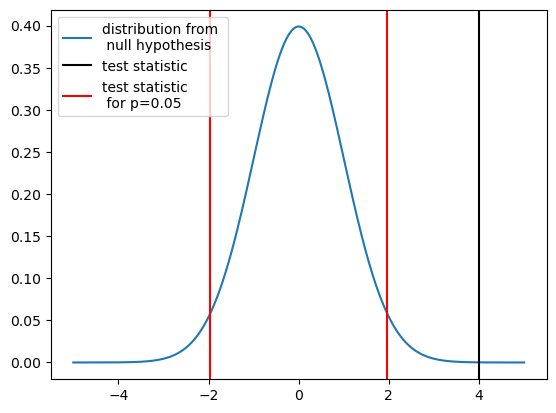

In [12]:
# do a simple hypothesis test on some made up data
# in general you don't need to make plots like this
# you only need the test value of the statistic and 
# the critical value of the test that you are using. 
# I thought that the plot was illustrative though so I included it.

# remember where I defined this? I forgot the first time I wrote this.
x=np.linspace(-5,5,501)
P = gauss(x,0,1)

# lets generate some random samples with a given mean and variance 
N=1000
mu_true=0.1
sigma_true=1
# use scipy.stats to get random samples instead of numpy.random 
# no real reason, just showing a different method.
samples=st.norm.rvs(loc=mu_true,scale=sigma_true,size=N)
# now we will make the test statistic
z=np.mean(samples)/(sigma_true/np.sqrt(N))

print(z)

lowerval=st.norm.ppf(0.025,loc=0,scale=sigma_true)
upperval=st.norm.ppf(0.975,loc=0,scale=sigma_true)

plt.plot(x,P,label='distribution from \n null hypothesis')
plt.axvline(z,color='k',label='test statistic')
plt.axvline(lowerval,color='r',label='test statistic \n for p=0.05')
plt.axvline(upperval,color='r')
plt.legend()

# note, if you refresh the cell a bunch of times the test statistic will hop around
# I've chosen the default parameters so that its likely that test statistic will reject the null hypothesis 
# but if you run it enough times you will get some that samples that accep tthe null hypothesis.
# what does that mean?

## Tests of the mean with an unknown standard deviation
- In general, we don't know the standard deviation of our data, so we need to include this estimate in our data. The right distribution to use in this case is "Student's t-test". The test statistic for a null hypothesis of having a mean of 0 is $$ t=\frac{\overline{x}}{\frac{s_x}{N}} $$ where $s_x$ is an estimate of the standard deviation given by $$ s_x = \sqrt{\overline{x'^2}} $$
    - it can be shown that $$ t \sim \mathcal{T}(0,1,N-2)$$ where $\mathcal{T}$ is the t-distribution. The first two arguments are the same as the normal distribution, but unlike the normal distribution the t-distribution changes when the number of samples are changed. Thus the third argument is the "degrees of freedom" of the distribution, its equal to the number of samples - number of statistics we have to estimate from the data.   
- The t-distribution converges pretty rapidly to the normal distribution as $N> 25$ or so. Also, a t statistic of about 2 roughly corresponds to a p value of 0.05, which leads to a good rule of thumb. If you have some random data, and you want to see if the mean is different than 0, you can see if the following is true: $$ \frac{\overline{x}}{\frac{s}{\sqrt{N}}} \geq 2$$ and if it is, then you can approximately reject the null hypothesis at the 0.05 level.
    - a professor of mine once referred to this as a "street wise t-test".  
- Suppose we want to compare two separate datasets, $x_i$ and $y_i$. Our null hypothesis will be that the difference in means is $\Delta\mu^{hyp}$. Then the t-statistic is $$ \frac{\left(\overline{x}-\overline{y}\right)-\Delta\mu^{hyp}}{\sqrt{\frac{s_x^2}{N_x}+\frac{s_y^2}{N_y}}} $$
    - $t$ is distributed like $$t \sim \mathcal{T}(0,1,Nx+N_y-2)$$
    - the quantity $$\sqrt{\frac{s_x^2}{N_x}+\frac{s_y^2}{N_y}}$$ is called the "pooled variance". 
    - The earlier test of a sample having 0 mean is a special case of the this test, which results from setting $N_y=\infty$ and $\overline{y}=0$. This is the same as saying that we have infinite confidence in our observations of $y$. 

## Correlation Test

- the correlation coeffecient is $$ \rho = \frac{\overline{x'y'}}{s_xs_y}$$
- For a set of $N$ paired samples $\left(x_i,y_i\right)$, it can be shown that the test statistic $$t_0 = \frac{\rho \sqrt{N-2}}{\sqrt{1-\rho^2}} $$ is distributed like $$ t_0 \sim \mathcal{T}\left( 0,1,N-2 \right) $$
- If we find that $t_0>t_{p/2,N-1}$, then we can reject the hypothesis that $\rho=0$ and the 1-p level.

## Variance Test

- Since the variance is positive by definition, its better to compare the ratio of the variances rather than the differences.
- The test statistic we can use is $$ F = \frac{s_x}{s_y} $$  
- This is distributed according to the F-distribution with $N_x-1$ and $N_y-1$ degrees of freedom.

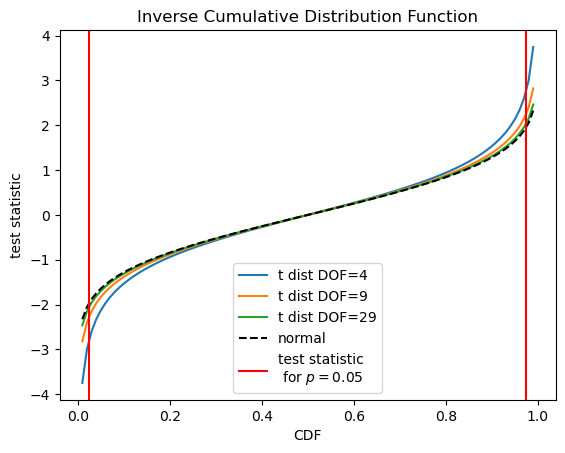

In [13]:
# lets plot the inverse cdfs and for the normal distribution and the t-distribution
nl=[5,10,30]
x=np.linspace(0,1,101)
for n in nl:
    # the inverse cdf function is called the ppf
    # here I am sampling the inverse cdf at some values between 0 and 1
    # because the cdf is by definition between 0 and 1.
    tvals=st.t.ppf(x, n - 1, loc = mean, scale = std_dev)
    plt.plot(x,tvals,label=f't dist DOF={n-1}')
zvals=st.norm.ppf(x, loc = mean, scale = std_dev)
plt.plot(x,zvals,'k--',label='normal')
plt.title('Inverse Cumulative Distribution Function')
# for curiosity, lets see what the values of the test statistic would need to be to get 
# a p value of 0.05 for a two sided test 
# the test values more extreme than the red lines will reject the null hypothesis with p=0.05
# test values inside these red lines will accept the null hypothesis with p=0.05 
plt.axvline(0.025,color='r',label='test statistic \n for $p=0.05$ ')
plt.axvline(0.975,color='r')
plt.xlabel('CDF')
plt.ylabel('test statistic')
plt.legend()


## Summary table 
This is from DelSole, Timothy, and Michael Tippett. Statistical methods for climate scientists. Cambridge University Press, 2022. Chapter 2

![](../images/Hyp_test_summary.png)

## A brief aside about the bias of estimators
- We've seen know that the variance of an estimator is, e.g. the standard error of the mean. What about the means?
- For the mean estimator this is pretty easy to calculate: $$ \begin{align*} \left<\overline{x}\right> &=& \left<\frac{1}{N}\sum_i x_i\right>\\ &=& \frac{1}{N}\sum_i \left<x_i\right> \\ &=& \frac{1}{N}\sum_i \left<x\right> \\ &=& \frac{N}{N}\left<x\right> \\ &=& \left<x\right> \\ \end{align*} $$
- so the bias of the mean estimator is $B\left(\overline{x}\right) = \left<\overline{x}-\left<x\right>\right>=0$, i.e. it is unbiased.
- Lets try a biased estimator for the variance, $$ s_b^2=\frac{1}{N}\sum_i (x_i-\bar{x})^2$$ To compute the bias we compute the expectation value of $s_b$:  $$\begin{align*} \left<s_b^2\right> &=& \left< \frac{1}{N}\sum_i \left(X_i-\overline{X}\right)^2 \right> \\
&=& \left< \frac{1}{N}\sum_i \left(X_i-\mu-\overline{X}+\mu\right)^2 \right> \\ 
&=& \left< \frac{1}{N}\sum_i \left(X_i-\mu\right)^2 - 2\left(\overline{X}+\mu\right)\frac{1}{N}\sum_i \left(X_i-\mu\right) +\left(\overline{X}-\mu\right)^2 \right> \\  
&=& \left< \frac{1}{N}\sum_i \left(X_i-\mu\right)^2 - 2\left(\overline{X}-\mu\right)^2+\left(\overline{X}-\mu\right)^2 \right> \\
&=& \left< \frac{1}{N}\sum_i \left(X_i-\mu\right)^2 \right> - \left<  \left(\overline{X}-\mu\right)^2 \right> \\  
&=& \sigma^2 - \frac{\sigma^2 }{N}\\
&=& \sigma^2 \frac{N-1}{N} \\ \end{align*} $$ where we have used the standard error of the mean: $\left<\overline{X}\right>=\frac{\sigma}{\sqrt{N}}$
- So if instead we used $s^2=\frac{N}{N-1}s_b^2$ we would have an unbiased estimator.

# 1.4 - Linear Regression

This material mostly follows from 

- DelSole, Timothy, and Michael Tippett. Statistical methods for climate scientists. Cambridge University Press, 2022. Chapter 8-9 

## 1D example
- Most people have seen linear regression before, but maybe not all of the details. Intuitively we can think of linear regression as finding the "line of best fit" to a bunch of data. Here we are going to go through all the details for a 1D example, and then generalize to a ND without much support.
- Formally, we start with a set of data points $(x_i,y_i)$ we define a predictor model $$ \hat{y}_i = mx_i+b $$ and then we want to find a way to choose $m$ and $b$ so that the error is minimized.
- How we define the error defines the type of regression model that we are working with. The most common type is "Least-Squares Regression", which is based on defining the error as the total squared difference. We can define the error per measurement as $$ \epsilon_i = y_i - \hat{y}_i $$ For some reason that I don't understand its traditional to write total error functions, or objective functions as they are sometimes called, with a $J$: $$ J=\sum_{i} \left( \hat{y}_i-y_i\right)^2 $$ Its often convenient to write the sum as the mean times the number of measurements $N$, e.g. $$ J=N \overline{\left( \hat{y}_i-y_i\right)^2}  $$ 
- We want to choose $m$ and $b$ in a way that $J$ is minnimized. This will happen when the partial derivatives of $J$ with respect to the model parameters is zero: $$ \begin{align*} \partial_{m} J =0 \\ \partial_{b} J =0\end{align*} $$
- carrying out the derivatives and dividing by some constants $$ \begin{align*} \overline{\left( \hat{y}_i-y_i\right)\partial_m{\hat{y}_i}}=0 \\ \overline{\left( \hat{y}_i-y_i\right)\partial_b{\hat{y}_i}} =0\end{align*} $$ and using $\partial_{m}\hat{y}_i=x_i$ and $\partial_{b}\hat{y}_i=1$ we get the two constraints: $$ \begin{align*} \overline{\left( \hat{y}_i-y_i\right)x_i}=0 \\ \overline{\left( \hat{y}_i-y_i\right)} =0\end{align*} $$
- The second constraint says that the mean of the model and the mean of the data has to be the same, in other words $$\overline{y}=\overline{\hat{y}}=m\overline{x}+b$$
- We can work with the first constraint now. Since $\overline{\hat{y}}=\overline{y}$, $\hat{y}_i-y_i=\hat{y}'-y_i'$. Also, from the second constraint we have that $\hat{y}_i'=mx_i'$, and so the first constraint can be written $$ \begin{align*} \overline{\left( \hat{y}_i-y_i\right)x_i}=0 \\ \overline{\left( \hat{y}_i'-y_i'\right)x_i'} =0 \\ \overline{\left( m x_i'-y_i'\right)x_i'} =0 \\ m \overline{x_i'^2} =\overline{x_i' y_i'} \\ m  =\rho \frac{s_y}{s_x} \end{align*} $$
    - Note also that can multiply both sides of the original constraint by $m$ to get: $$ \overline{\epsilon_i'\hat{y}_i'}=0 $$ in other words, the regression errors are uncorrelated with the original data. This is a key feature of linear regression, since it means that we have created a model without any systematic bias. 
    - for completeness: $$b = \overline{y}-\rho  s_y \frac{\overline{x}}{s_x}$$
### How good is the model?
- We can start by manipulating the total variance of y is: $$ \begin{align*} s_y^2 &=& \overline{\left(y-\overline{y}\right)^2} \\ &=& \overline{\left[\left(y-\hat{y}\right)-\left(\hat{y}-\overline{y}\right)\right]^2}\\ &=& \overline{\epsilon_i'^2}+2\overline{\epsilon_i'\hat{y}_i'}+\overline{\hat{y}_i'^2}\\ \end{align*} $$
- the second constraint means that the middle term is 0. Also, we can write $\overline{\hat{y}_i'^2}=m\overline{x_i'^2}=\left(\rho s_y s_x^{-1}\right)^2s_x^2=\rho^2s_y^2$, and so: $$ s_y^2 =  \overline{\epsilon_i'^2} + \rho^2s_y^2 $$ and dividing through by $s_y^2$: $$ 1 = \frac{\overline{\epsilon_i'^2}}{s_y^2} + \rho^2 $$
    - the first term on the left is the normalized error. you might be familiar with statements about $\rho^2$ as the "fraction of variance explained", this is because it is the fraction of the variance associated with the variance of the model. The normalized error is the fraction of the variance not explained by the model. 
    - if $\rho^2=1$, then the model is perfect and the linear regression perfectly fits the data. if $\rho^2=0$, the the model has no predicative power. 


## Multivariate regression 
- Generalizing this to multivariate expressions is important for doing computations, but not really that insightful.
- Suppose that we have a data set of the form of $N$ tuples: $$ (y_i,x_{i1},x_{i2},..,{x_{im}}) $$ e.g. we have N tuples which each have 1 variable we want to predict $y_i$ and $M$ predictor variables ${x_{i1}}$, etc. Its often easier to write this as two matrices: $$ Y = \left( y_1,y_2,...y_N \right) $$ is an 1XN matrix and $$ X = \left(\begin{array}{ccccc}
x_{11} & x_{12} & ... &  & x_{1M}\\
\\
\vdots &  & x_{ij} &  & \vdots\\
\\
x_{N1} & ... &  &  & x_{NM}
\end{array}\right) $$ is a NxM matrix. 
- The linear model can be written $$ \hat{y} = X A $$ where $\hat{y}$ is a Nx1 matrix, $X$ is a NxM matrix, and $A$ is a Mx1 matrix.
- The least squares solution can be found in exactly the same way, but now there will be $m$ constrains instead of 2. The solution can be kind of tedious, but the answer is $$ A = \left(X^T X\right)^{-1} X^T Y $$
- The associated fraction of explained variance is $$ \rho^2 = \frac{Y^T X \left(X^T X\right)^{-1} X^T Y}{Y^T Y}  $$
- To include a constant term in a multivariate regression problem you simply append an extra constant predictor, making X and Nx(M+1) matrix, e.g. 
$$ X = \left(\begin{array}{ccccc}
x_{11} & x_{12} & ... &  & x_{1M}\\
\\
\vdots &  & x_{ij} &  & \vdots\\
\\
x_{N1} & ... &  &  & x_{NM} \\
1 & ... & & &  1\\
\end{array}\right) $$ 


check size of X: (50, 2)
check inferred parameters: [1.88910697 1.17927448]


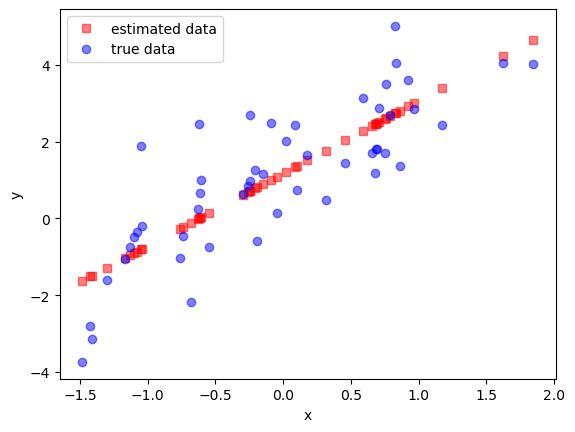

In [14]:
# lets do a small example with some fake data
# put in a linear model that we corrupt with some noise 
# and see if we can estimate the true parameters
mtrue=2
btrue=1
N=50
noise=1
# generate some random points to sample
x=np.random.randn(N)
# add some noise to our linear model
ytrue=mtrue*x+btrue + noise*np.random.randn(N)

# append some ones to the data so that we include the constant parameter
X=np.vstack([x,np.ones(N)]).T
print('check size of X:',X.shape)

A = np.dot( la.inv(np.dot(X.T,X)), np.dot(X.T,ytrue) )

print('check inferred parameters:',A)

yest = np.dot(X,A)

plt.plot(x,yest,'rs',label='estimated data',alpha=0.5)
plt.plot(x,ytrue,'bo',label='true data',alpha=0.5)
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Confidence intervals of the parameters
- defining the error matrix of the model as $\epsilon = y - x A$, we get objective function is: $$ J=\epsilon^T\epsilon$$
    - Although we minnimized $J$, unless we have a perfect model $J\neq 0$. 
- What is the average error that we will have? Its tempting to say that it should be $J/N$, however we have fitted $M$ constraints to the original data, which reduces the degrees of freedom that we have. For instance, imagine we only had 4 data points and we wanted to fit 2 parameters to the data. We would have 4 data points and 2 equations, so there would only be 2 of the data points that could be changed independently. In general, we only have $N-M$ degrees of freedom, and so the average error should be $$S = \frac{J}{N-M}$$
    - this illustrates an important tradeoff - in general the larger the number of parameters that we want to fit the larger the average error that we incur. 
- For a single parameter we can form the test statistic: $$ t = \frac{A_i-A^{hyp}_i}{\sqrt{J d_i}}$$ where  $$ d_i = {\left(X^TX\right)^{-1}}_{ii}$$
- the test statistic is distributed with a t-distribution with N-M degrees of freedom.
- a standard test is to see if the null hypothesis of a parameter being 0 can be rejected. If so then this indicates that the parameter is necessary for the model. If not, then the parameter is not providing any additional power to the model.
- This is the basis of trend analysis. If we choose time as a predictor variable, we can test the null hypothesis that $A_i$ corresponding to time is 0. If we can reject that hypothesis, then there is a significant trend to our data. 
- the associated confidence interval is: $$ A_i \pm t_{{p/2},{N-M}}\sqrt{J d_i} $$
